In [58]:
from typing import TypedDict,List  #Annotations
from langgraph.graph import StateGraph #Frameowrk that assist in designing thye flow of the tasks in the application using graph.

In [ ]:
#we have to crate an AgentState -shared Data Structure that keeps track of information as your application runs.
#Multiple different input
#This defines the structure that holds your data (inputs + outputs)

class AgentState(TypedDict):
    values:List[int]
    name:str
    result:str



In [ ]:
#This function takes the state as input, processes it, and returns the updated state.

def processing_values(state: AgentState) -> AgentState:    # Input state output will be state 
    """This function handles multiple different inputs""" #Healthy Habbit 
    

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"  #this will help to update result part of the state (It then stores that message in state["result"])

    print(state)
    return state

In [61]:
graph=StateGraph(AgentState)

graph.add_node("Processing",processing_values) #--> To add Node(add_node(requires two parameter 1:Name of the Node 2:What Action it performs)
graph.set_entry_point("Processing")#  Requires 1 Paremter the name of the node you want to connect it.
graph.set_finish_point("Processing")#  Requires 1 Paremter the name of the node you want to connect it.

In [62]:
app = graph.compile() # Compiling the graph

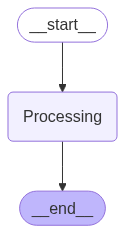

In [63]:
app

In [66]:
answers = app.invoke({"values": [0,10,10], "name": "Nitish"})

{'values': [0, 10, 10], 'name': 'Nitish'}
{'values': [0, 10, 10], 'name': 'Nitish', 'result': 'Hi there Nitish! Your sum = 20'}


In [67]:
print(answers['result'])

Hi there Nitish! Your sum = 20


Excercise

Create a Graph where you pass in:

a list of integers,

a name,

and an operation.

If the operation is "+", you add the elements.
If the operation is "*", you multiply the elements.

All logic must be handled in a single node.

In [106]:
from typing import TypedDict,List  #Annotations
from langgraph.graph import StateGraph #Frameowrk that assist in designing thye flow of the tasks in the application using graph.
import math

In [107]:
class AgentState(TypedDict):
    values:list[int]
    name:str
    operation:str
    result:str

In [108]:
math.prod([1,2])

2

In [126]:
import math

def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
        state["result"] = "Invalid!"

    return state

In [127]:
graph=StateGraph(AgentState)

graph.add_node("Operation_Calc",operation) #--> To add Node(add_node(requires two parameter 1:Name of the Node 2:What Action it performs)
graph.set_entry_point("Operation_Calc")#  Requires 1 Paremter the name of the node you want to connect it.
graph.set_finish_point("Operation_Calc")#  Requires 1 Paremter the name of the node you want to connect it.

In [128]:
apps=graph.compile()

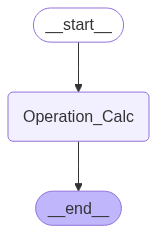

In [129]:
apps

In [135]:
answers = apps.invoke({"name": "Nitish","values": [1,2,3,4] , "operation": "*"})

In [136]:
answers

{'values': [1, 2, 3, 4],
 'name': 'Nitish',
 'operation': '*',
 'result': 'Hi there Nitish! Your answer is 24'}